In [2]:
import numpy as np
import pandas as pd
from scipy import stats


%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as pn
pd.set_option("display.max_columns", None)

# Zbiory danych z których będziemy korzystać

In [3]:
mpg = pd.read_table("auto-mpg.csv", sep = ",") # https://www.kaggle.com/datasets/uciml/autompg-dataset

diamonds = pd.read_csv("diamonds.csv").iloc[:,1:] # https://www.kaggle.com/datasets/shivam2503/diamonds

flights = pd.read_csv("flights.csv") # https://www.kaggle.com/datasets/tylerx/flights-and-airports-data

airports = pd.read_csv("airports.csv") # https://www.kaggle.com/datasets/tylerx/flights-and-airports-data

gapminder = pd.read_csv("gapminder_full.csv") # https://www.kaggle.com/datasets/tklimonova/gapminder-datacamp-2007

weather = pd.read_csv("https://raw.githubusercontent.com/matzim95/ML-datasets/master/weather.csv")
weather["date"] = pd.to_datetime(weather.date)

austin_weather = pd.read_csv("https://raw.githubusercontent.com/matzim95/ML-datasets/master/austin_weather.csv")
austin_weather["Date"] = pd.to_datetime(austin_weather.Date)

co2 = pd.read_csv("https://raw.githubusercontent.com/matzim95/ML-datasets/master/co2.csv")
co2["Date"] = pd.to_datetime(co2.Date)

temperature = pd.read_csv("https://raw.githubusercontent.com/matzim95/ML-datasets/master/temperature.csv")
temperature["dt"] = pd.to_datetime(temperature.dt)

population = pd.read_csv("https://raw.githubusercontent.com/matzim95/ML-datasets/master/population.csv")

wine = pd.read_csv("https://raw.githubusercontent.com/matzim95/ML-datasets/master/wine.csv")

iris = pd.read_csv("https://raw.githubusercontent.com/matzim95/ML-datasets/master/iris.csv")

sales = pd.read_csv("company_sales_data.csv")

tips = sns.load_dataset("tips")

flights_ts = sns.load_dataset("flights")

penguins = sns.load_dataset("penguins")

# Skarbnica wiedzy o wykresach

https://www.python-graph-gallery.com/

# Matplotlib

https://matplotlib.org/

###### Pierwszy rysunek

[]

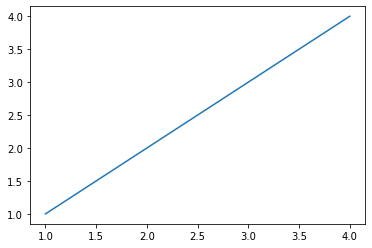

In [5]:
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

fig, ax = plt.subplots()

ax.plot(x, y)

plt.plot()

[]

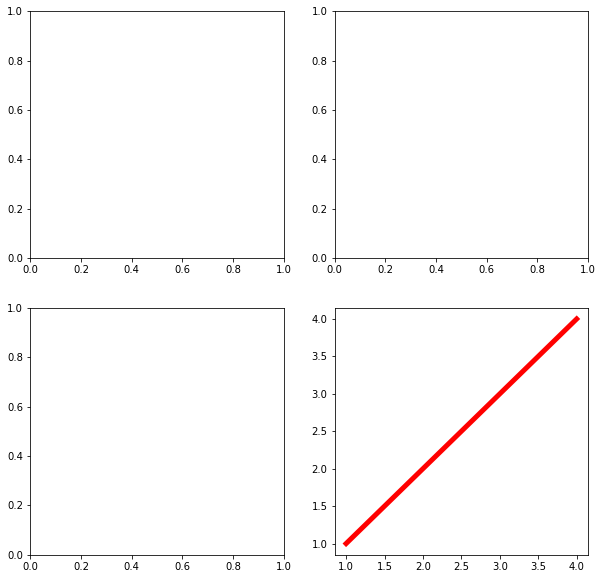

In [7]:
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

fig, ax = plt.subplots(2, 2, figsize = (10, 10))

ax[1, 1].plot(x, y, color = "red", lw = 5)

plt.plot()

###### Dodanie siatki

[]

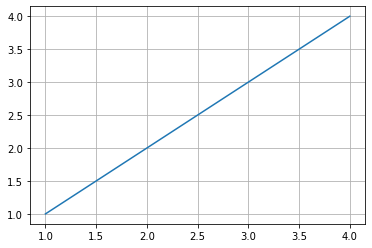

In [14]:
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

fig, ax = plt.subplots()

ax.plot(x, y)
ax.grid()
plt.plot()

[]

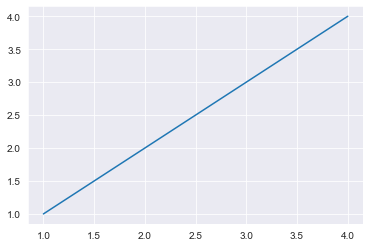

In [18]:
sns.set_style("darkgrid")
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

fig, ax = plt.subplots()

ax.plot(x, y)
plt.plot()

###### Metoda plot rysuje wykresy liniowe

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

[]

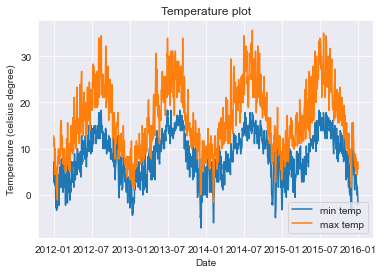

In [25]:
fig, ax = plt.subplots()

ax.plot(weather.date, weather.temp_min, label = "min temp")
ax.plot(weather.date, weather.temp_max, label = "max temp")

ax.set_title("Temperature plot")
ax.set_xlabel("Date")
ax.set_ylabel("Temperature (celsius degree)")

plt.legend()
plt.plot()

Ćwiczenie: Korzystając ze zbioru danych sales przedstaw na wykresie liniowym całkowity zysk uzyskiwany w poszczególnych miesiącach.

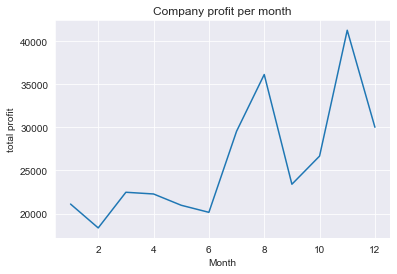

In [31]:
#ToDo
sales.head()

fig, ax = plt.subplots()

ax.plot(sales.month_number, sales.total_units)

ax.set_title("Company profit per month")
ax.set_xlabel("Month")
ax.set_ylabel("total profit")

plt.show()

Ćwiczenie. Korzystając ze zbioru danych gapminder przedstaw dynamikę zmian PKB per capita w Polsce na przestrzeni lat. Ustaw szerokość linii na 10 i kolor na czerwony. Podpisz osie i zatytyłuj wykres. Rok przedstaw w postaci daty (datetime).

In [35]:
#ToDo
pd.to_datetime([f"{i}-01-01" for i in gapminder.year])

DatetimeIndex(['1952-01-01', '1957-01-01', '1962-01-01', '1967-01-01',
               '1972-01-01', '1977-01-01', '1982-01-01', '1987-01-01',
               '1992-01-01', '1997-01-01',
               ...
               '1962-01-01', '1967-01-01', '1972-01-01', '1977-01-01',
               '1982-01-01', '1987-01-01', '1992-01-01', '1997-01-01',
               '2002-01-01', '2007-01-01'],
              dtype='datetime64[ns]', length=1704, freq=None)

###### Markery, linie i kolory w metodzie plot

* Markery: https://matplotlib.org/stable/api/markers_api.html
* Linie: https://matplotlib.org/3.0.3/gallery/lines_bars_and_markers/line_styles_reference.html
* Kolory: https://matplotlib.org/stable/gallery/color/named_colors.html

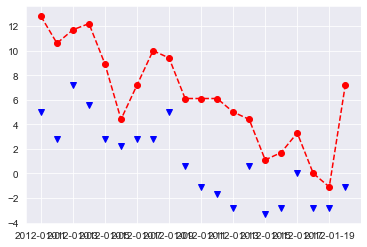

In [39]:
n = 20
weather.head()

fig, ax = plt.subplots()

ax.plot(weather.date[:n], weather.temp_max[:n], marker = "o", linestyle = "--", color = "red")
ax.plot(weather.date[:n], weather.temp_min[:n], marker = "v", linestyle = "None", color = "blue")

plt.show()

###### Parametry wykresu

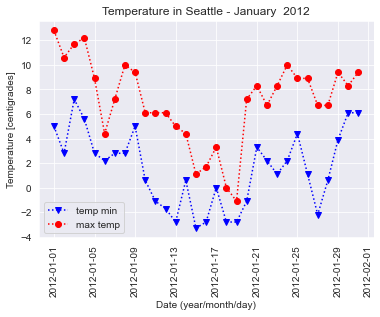

In [52]:
n = 31

fig, ax = plt.subplots()

ax.plot(weather.date[:n], weather.temp_min[:n], marker = "v", 
        linestyle = "dotted", color = "blue", label = "temp min")
ax.plot(weather.date[:n], weather.temp_max[:n], marker = "o", 
        linestyle = "dotted", c = "r", label = "max temp")

ax.set_xlabel("Date (year/month/day)")
ax.set_ylabel("Temperature [centigrades]")
ax.set_title("Temperature in Seattle - January  2012")
ax.xaxis.set_tick_params(rotation = 90)
plt.legend(loc = "lower left")

#ax.set_xlim(pd.to_datetime("2011-12-01"), pd.to_datetime("2012-03-01"))

plt.show()

Ćwiczenie: Korzystając ze zbioru danych sales przedstaw na wykresie liniowym liczbę sprzedawanych produktów w poszczególnych miesiącach. Przedstaw wykres w stylu:
* Linia kropkowana w czerwonym kolorze i grubości 3
* Pokaż legendę w prawym górnym rogu (nazwa: "total units")
* Etykieta osi x: "Month number"
* Etykieta osi y: "Sold units number"
* Ustaw markery jako kropki w czarnym kolorze

In [53]:
#ToDo
sales.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


Ćwiczenie: Na podstawie zbioru danych gapminder przedstaw dynamikę zmian przeciętnej długości życia na świecie na przestrzeni lat. Stwórz wykres nadający się do publikacji naukowej/raportu.

In [4]:
#ToDo

###### Wiele danych na wykresie

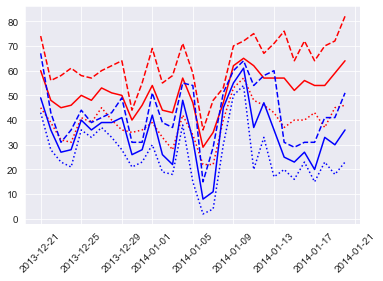

In [62]:
fig, ax = plt.subplots()

n = 31
ax.plot(austin_weather.Date[:n], austin_weather.TempAvgF[:n], color = "red")
ax.plot(austin_weather.Date[:n], austin_weather.TempHighF[:n], color = "red", linestyle = "--")
ax.plot(austin_weather.Date[:n], austin_weather.TempLowF[:n], color = "red", linestyle = "dotted")

ax.plot(austin_weather.Date[:n], austin_weather.DewPointAvgF[:n].astype("float"), color = "blue")
ax.plot(austin_weather.Date[:n], austin_weather.DewPointHighF[:n].astype("float"), color = "blue", linestyle = "--")
ax.plot(austin_weather.Date[:n], austin_weather.DewPointLowF[:n].astype("float"), color = "blue", linestyle = "dotted")

ax.xaxis.set_tick_params(rotation = 45)

plt.show()

Ćwiczenie: Na podstawie zbioru danych sales wyświetl na jednym wykresie sprzedaż wszystkich kategorii produktów w poszczególnych miesiącach. Wykorzystaj do tego pętlę for.

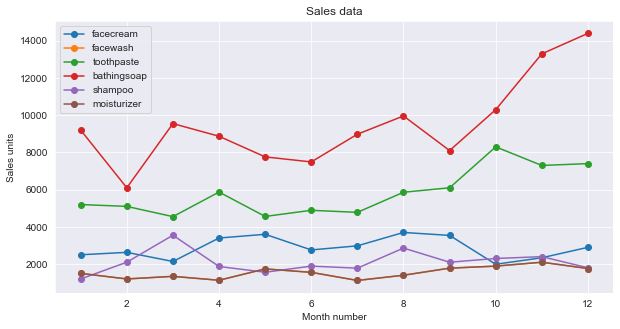

In [68]:
products = ["facecream", "facewash", "toothpaste", "bathingsoap", "shampoo", "moisturizer"]

fig, ax = plt.subplots()

fig.set_size_inches([10, 5])

for product in products:
    ax.plot(sales.month_number, sales[product], marker = "o", label = product)
    
    
ax.set_title("Sales data")
ax.set_xlabel("Month number")
ax.set_ylabel("Sales units")
plt.legend()

plt.show()

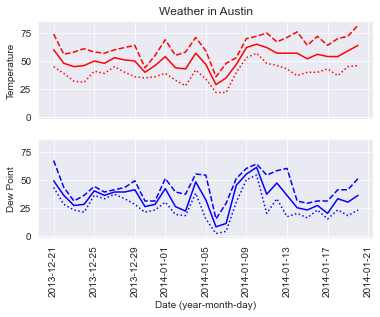

In [73]:
fig, ax = plt.subplots(2, 1, sharey = True)

n = 31
ax[0].plot(austin_weather.Date[:n], austin_weather.TempAvgF[:n], color = "red")
ax[0].plot(austin_weather.Date[:n], austin_weather.TempHighF[:n], color = "red", linestyle = "--")
ax[0].plot(austin_weather.Date[:n], austin_weather.TempLowF[:n], color = "red", linestyle = "dotted")

ax[1].plot(austin_weather.Date[:n], austin_weather.DewPointAvgF[:n].astype("float"), color = "blue")
ax[1].plot(austin_weather.Date[:n], austin_weather.DewPointHighF[:n].astype("float"), color = "blue", linestyle = "--")
ax[1].plot(austin_weather.Date[:n], austin_weather.DewPointLowF[:n].astype("float"), color = "blue", linestyle = "dotted")

ax[0].set_title("Weather in Austin")
ax[0].set_ylabel("Temperature")
ax[0].set_xticklabels([])
ax[1].set_ylabel("Dew Point")
ax[1].set_xlabel("Date (year-month-day)")
ax[1].xaxis.set_tick_params(rotation = 90)

#ax[1].set_ylim(-100, None)

plt.show()

Ćwiczenie: Na podstawie zbioru danych gapminder porównaj Azję i Europę pod względem PKB per capita i przeciętnej długości trwania życia na przestrzeni lat. Przedstaw to za pomoca dwuwymiarowej macierzy wykresów liniowych.

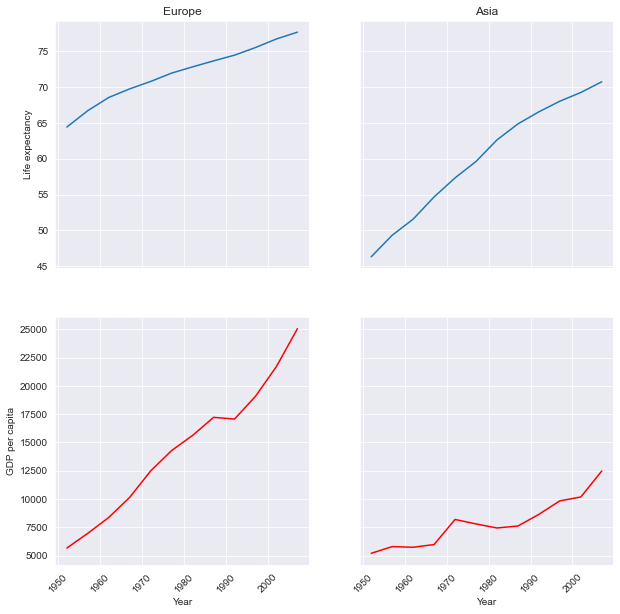

In [82]:
df = (gapminder.groupby(by = ["year", "continent"], as_index = False).
     agg(life_exp = ("life_exp", "mean"),
        gdp_cap = ("gdp_cap", "mean")))

df["date"] = pd.to_datetime([f"{i}-01-01" for i in df.year])

asia = df.loc[df.continent == "Asia",:]
europe = df.loc[df.continent == "Europe",:]


fig, ax = plt.subplots(2, 2, sharey = "row")

fig.set_size_inches([10, 10])

ax[0, 0].plot(europe.date, europe.life_exp)
ax[0, 1].plot(asia.date, asia.life_exp)
ax[1, 0].plot(europe.date, europe.gdp_cap, color = "red")
ax[1, 1].plot(asia.date, asia.gdp_cap, color = "red")

ax[0,0].set_title("Europe")
ax[0,1].set_title("Asia")

ax[0,0].set_ylabel("Life expectancy")
ax[1,0].set_ylabel("GDP per capita")

ax[1,0].set_xlabel("Year")
ax[1,1].set_xlabel("Year")

ax[0,0].set_xticklabels([])
ax[0,1].set_xticklabels([])

ax[1,0].xaxis.set_tick_params(rotation = 45)
ax[1,1].xaxis.set_tick_params(rotation = 45)

###### Adnotacje na wykresie

https://matplotlib.org/2.0.2/users/annotations.html

C:\Users\wlamc\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


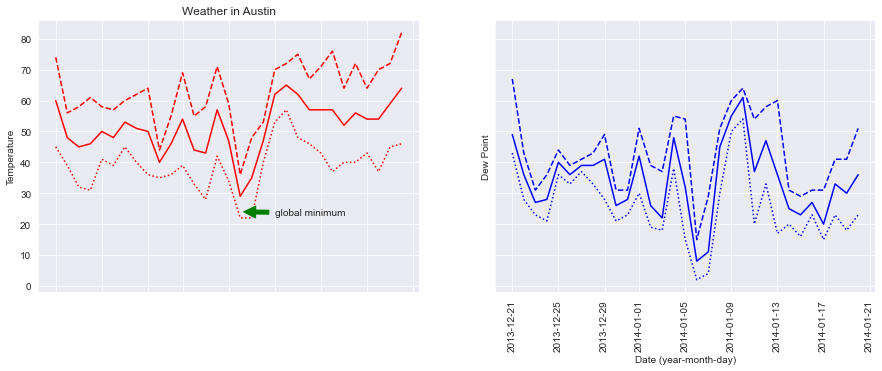

In [103]:
fig, ax = plt.subplots(1, 2, sharey = True)

fig.set_size_inches([15, 5])

n = 31
ax[0].plot(austin_weather.Date[:n], austin_weather.TempAvgF[:n], color = "red")
ax[0].plot(austin_weather.Date[:n], austin_weather.TempHighF[:n], color = "red", linestyle = "--")
ax[0].plot(austin_weather.Date[:n], austin_weather.TempLowF[:n], color = "red", linestyle = "dotted")

ax[1].plot(austin_weather.Date[:n], austin_weather.DewPointAvgF[:n].astype("float"), color = "blue")
ax[1].plot(austin_weather.Date[:n], austin_weather.DewPointHighF[:n].astype("float"), color = "blue", linestyle = "--")
ax[1].plot(austin_weather.Date[:n], austin_weather.DewPointLowF[:n].astype("float"), color = "blue", linestyle = "dotted")

ax[0].set_title("Weather in Austin")
ax[0].set_ylabel("Temperature")
ax[0].set_xticklabels([])
ax[1].set_ylabel("Dew Point")
ax[1].set_xlabel("Date (year-month-day)")
ax[1].xaxis.set_tick_params(rotation = 90)

ax[0].annotate('global minimum', xy = (pd.Timestamp("2014-01-06"), 24), 
               xytext = (pd.Timestamp("2014-01-09"), 23),
            arrowprops=dict(facecolor='black', shrink = 0.1, color = "green"),
            )

#ax[1].set_ylim(-100, None)

plt.show()

###### Szeregi czasowe

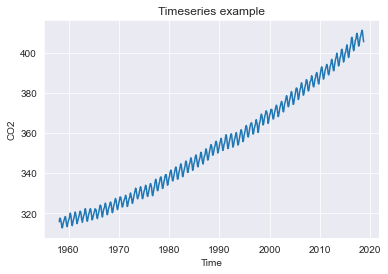

In [104]:
fig, ax = plt.subplots()

ax.plot(co2.Date, co2.Interpolated)

ax.set_xlabel("Time")
ax.set_ylabel("CO2")
ax.set_title("Timeseries example")
plt.show()

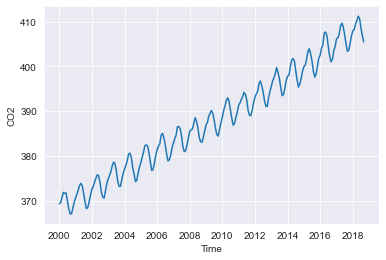

In [107]:
millenium = co2.loc[co2.Date >= "2000-01-01",:]

fig, ax = plt.subplots()

ax.plot(millenium.Date, millenium.Interpolated)

ax.set_xlabel("Time")
ax.set_ylabel("CO2")
plt.show()

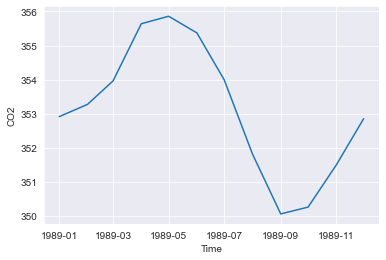

In [106]:
eighty_nine = co2.loc[co2.Date.dt.year == 1989,:]

fig, ax = plt.subplots()

ax.plot(eighty_nine.Date, eighty_nine.Interpolated)

ax.set_xlabel("Time")
ax.set_ylabel("CO2")
plt.show()

Ćwiczenie: Na podstawie danych co2 zwizualizuj szereg czasowy przedstawiający zmienną Average po 2000 roku. Spadki przedstaw na czerwono a wzrosty na zielono.

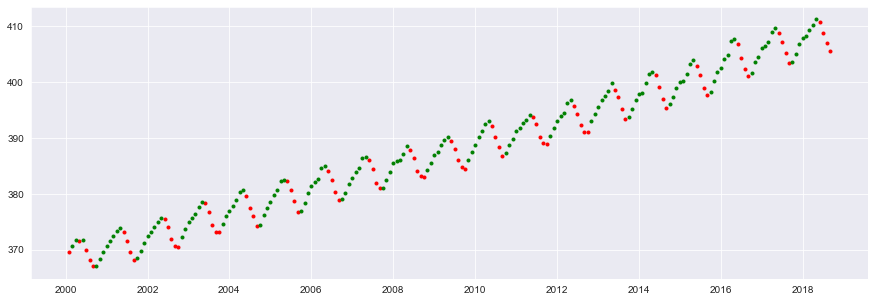

In [116]:
#ToDo
millenium = co2.loc[co2.Date > "2000-01-01",:]

colors = np.where(millenium.Average > millenium.Average.shift(1), "green", "red")

millenium_g = millenium.loc[colors == "green",:].copy()
millenium_r = millenium.loc[colors == "red",:].copy()


fig, ax = plt.subplots()

fig.set_size_inches([15, 5])

ax.plot(millenium_r.Date, millenium_r.Average, marker = ".", color = "red", linestyle = "None")
ax.plot(millenium_g.Date, millenium_g.Average, marker = ".", color = "green", linestyle = "None")

plt.show()

###### Zmienna oś Y

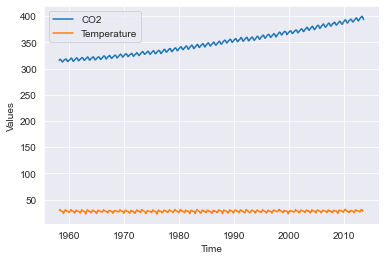

In [119]:
merged = temperature.loc[temperature.City == "Bangkok",:].merge(co2, how = "inner", left_on = "dt", right_on = "Date")

fig, ax = plt.subplots()

ax.plot(merged.dt, merged.Interpolated, label = "CO2")
ax.plot(merged.dt, merged.AverageTemperature, label = "Temperature")

ax.set_xlabel("Time")
ax.set_ylabel("Values")

plt.legend()

plt.show()

Jeden wykres

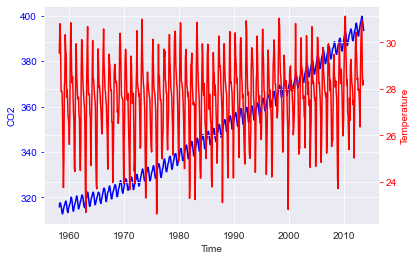

In [120]:
fig, ax = plt.subplots()

ax.plot(merged.dt, merged.Interpolated, color = "blue")
ax.set_xlabel("Time")
ax.set_ylabel("CO2", color = "blue")
ax.tick_params(axis = 'y', colors = 'blue')

ax2 = ax.twinx()
ax2.plot(merged.dt, merged.AverageTemperature, color = "red")
ax2.set_ylabel("Temperature", color = "red")
ax2.tick_params(axis = 'y', colors = 'red')

plt.show()

Dwa wykresy

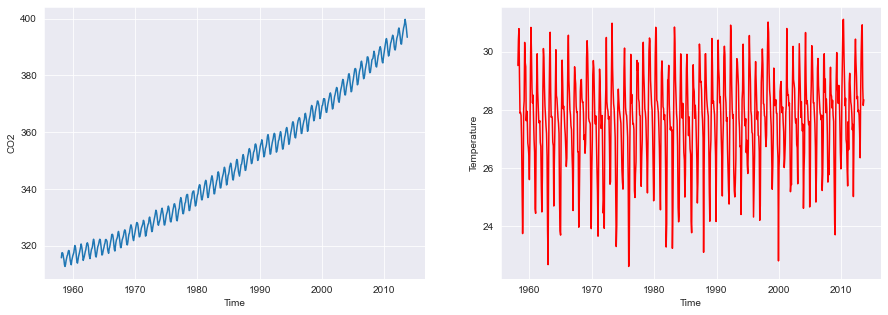

In [123]:
fig, ax = plt.subplots(1, 2, sharey = False)
fig.set_size_inches([15, 5])

ax[0].plot(merged.dt, merged.Interpolated)
ax[1].plot(merged.dt, merged.AverageTemperature, color = "red")

ax[0].set_xlabel("Time")
ax[0].set_ylabel("CO2")

ax[1].set_xlabel("Time")
ax[1].set_ylabel("Temperature")

plt.show()

###### Wykresy warstwowe

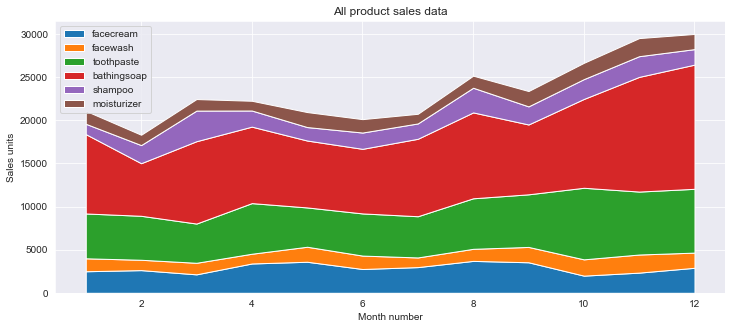

In [126]:
month = sales.month_number
facecream = sales.facecream
facewash = sales.facewash
toothpaste = sales.toothpaste
bathingsoap = sales.bathingsoap
shampoo = sales.shampoo
moisturizer = sales.moisturizer

fig, ax = plt.subplots()

fig.set_size_inches([12, 5])

ax.stackplot(month, facecream, facewash, toothpaste, bathingsoap, shampoo, moisturizer,
            labels = ["facecream", "facewash", "toothpaste", "bathingsoap", "shampoo", "moisturizer"])

ax.set_title("All product sales data")
ax.set_xlabel("Month number")
ax.set_ylabel("Sales units")

plt.legend(loc = "upper left")
plt.show()

###### Wykresy słupkowe

https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html#matplotlib.axes.Axes.bar

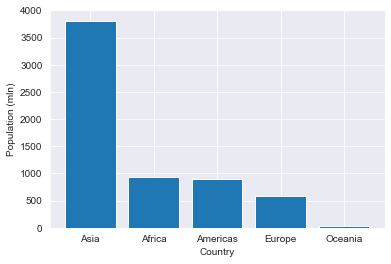

In [130]:
agg_df = (gapminder.loc[gapminder.year == 2007,:].groupby("continent", as_index = False).
agg(population = ("population", "sum")).sort_values(by = "population", ascending = False))

agg_df["population_mln"] = agg_df.population / 1000000

fig, ax = plt.subplots()

ax.bar(x = agg_df.continent, height = agg_df.population_mln)
ax.set_xlabel("Country")
ax.set_ylabel("Population (mln)")

plt.show()

Ćwiczenie: Na podstawie zbioru danych diamonds przedstaw na wykresie słupkowym średnią cenę diamentu dla poszczególnych jakości cięcia. Przedstaw dane w taki sposób, aby rodaje cięcia były posortowane od najwyższej do najniższej ceny.

Text(0.5, 1.0, 'Diamonds prices')

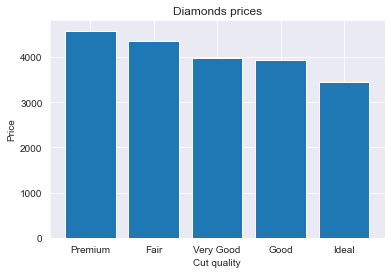

In [132]:
df = (diamonds.groupby(by = "cut", as_index = False).
      agg(price = ("price", "mean")).sort_values(by = "price", ascending = False))

fig, ax = plt.subplots()

ax.bar(x = df.cut, height = df.price)

ax.set_xlabel("Cut quality")
ax.set_ylabel("Price")
ax.set_title("Diamonds prices")

Ćwiczenie: Jak myślicz co może powodować że diamenty o jakości cięcia Fair są takie drogie skoro to najgorsza jakość cięcia ? W dalszej części zajęć rozbierzemy ten problem na czynniki pierwsze.

Text(0.5, 1.0, 'Diamonds weights')

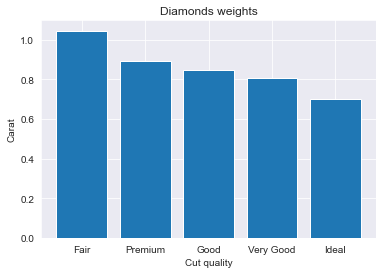

In [134]:
df = (diamonds.groupby(by = "cut", as_index = False).
      agg(carat = ("carat", "mean")).sort_values(by = "carat", ascending = False))

fig, ax = plt.subplots()

ax.bar(x = df.cut, height = df.carat)

ax.set_xlabel("Cut quality")
ax.set_ylabel("Carat")
ax.set_title("Diamonds weights")

Grupowy wykres słupkowy

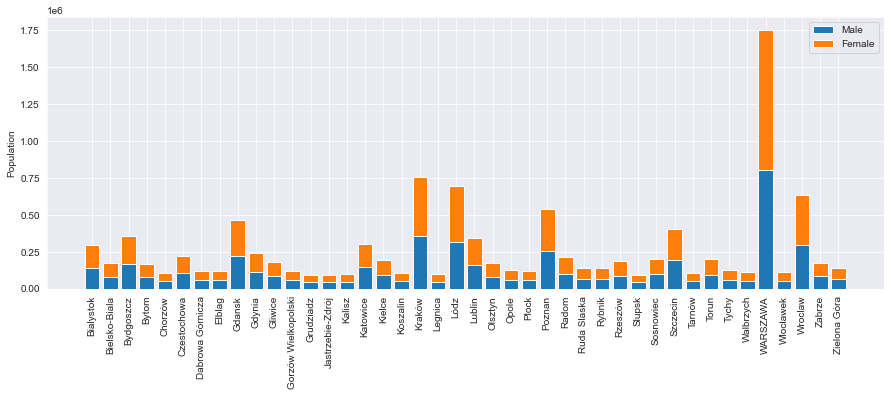

In [143]:
groupby = population.groupby("Sex")

both, female, male = [groupby.get_group(x) for x in groupby.groups]

fig, ax = plt.subplots()

fig.set_size_inches([15, 5])

ax.bar(male.City, male.Value, label = "Male")
ax.bar(female.City, female.Value, bottom = male.Value, label = "Female")

ax.set_ylabel("Population")
ax.tick_params("x", labelrotation = 90)
#ax.xaxis.set_tick_params(rotation = 90)

plt.legend()
plt.show()

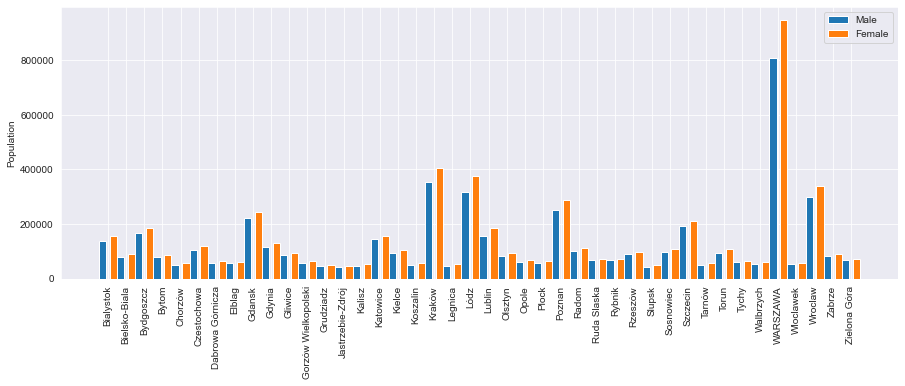

In [142]:
#groupby = population.groupby("Sex")

#both, female, male = [groupby.get_group(x) for x in groupby.groups]

both, female, male = (population.loc[population.Sex == "Both Sexes",:], population.loc[population.Sex == "Female",:],
                     population.loc[population.Sex == "Male",:])

fig, ax = plt.subplots()

fig.set_size_inches([15, 5])

l1 = np.arange(len(male.City.unique())) - 0.3
l2 = np.arange(len(male.City.unique())) + 0.3

ax.bar(l1, male.Value, width = 0.4, label = "Male")
ax.bar(l2, female.Value, width = 0.4, label = "Female")

ax.set_xticks(l1 + 0.3, male.City.unique())
ax.set_ylabel("Population")
ax.tick_params("x", labelrotation = 90)
#ax.xaxis.set_tick_params(rotation = 90)

plt.legend()
plt.show()

Ćwiczenie: Korzystając ze zbioru danych population przedstaw na horyzontalnym wykresie słupkowym liczbę ludności miast Polski w 2017 roku. Zacznij od najludniejszych miast.

Text(0.5, 0, 'Liczba ludności (tys.)')

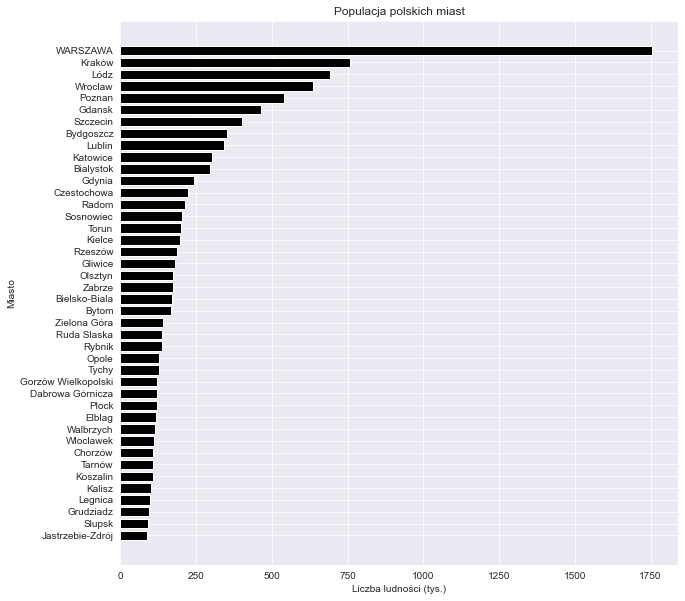

In [145]:
df = population.loc[population.Sex == "Both Sexes",:].sort_values(by = "Value", ascending = True)
df.Value = df.Value / 1000

fig, ax = plt.subplots()

fig.set_size_inches([10, 10])

ax.barh(y = df.City, width = df.Value, color = "black")

ax.set_title("Populacja polskich miast")
ax.set_ylabel("Miasto")
ax.set_xlabel("Liczba ludności (tys.)")

Ćwiczenie: Na podstawie zbioru danych sales pokaż na wykresie słupkowym porównanie sprzedaży kremów do twarzy i produktów do mycia twarzy.

In [4]:
# Homework
sales.head(1)

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000


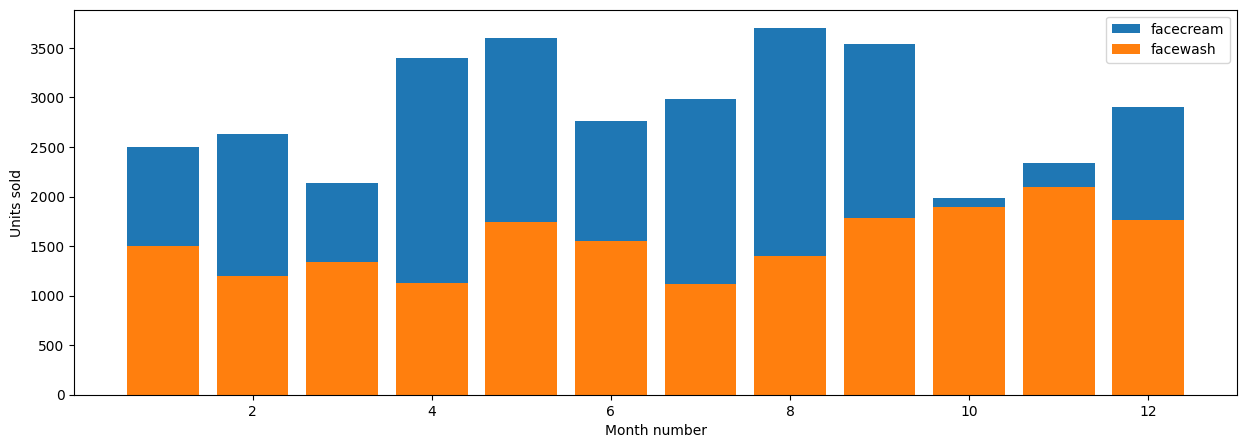

In [60]:
fit, ax = plt.subplots(figsize= (15,5))

ax.bar( sales["month_number"], sales["facecream"], label= "facecream")     
ax.bar(sales["month_number"], sales["facewash"], label= "facewash")


ax.legend()
ax.set_xlabel("Month number")
ax.set_ylabel("Units sold")

plt.show()

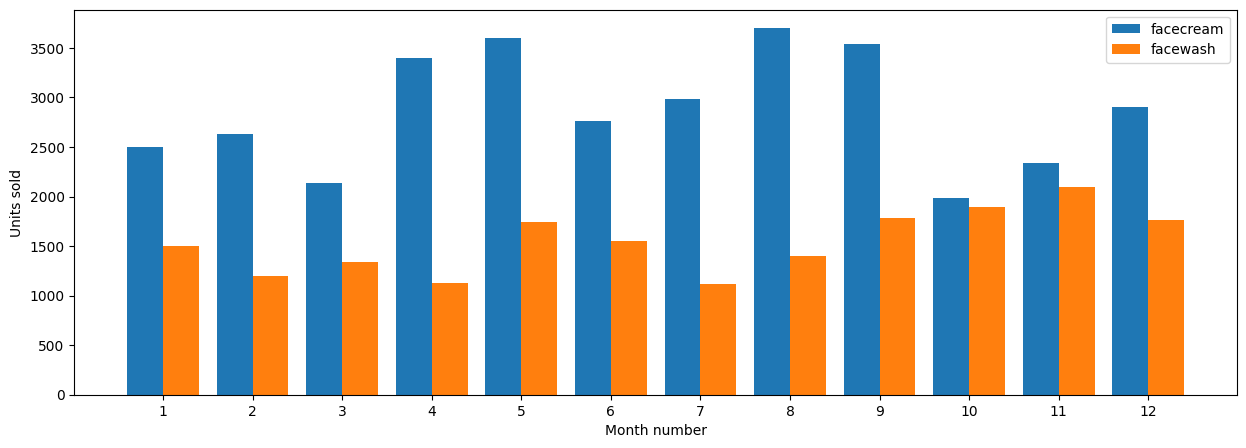

In [58]:
n = 0.2
h= 0.4
fit, ax = plt.subplots(figsize= (15,5))

l1 = np.arange(len(sales["month_number"].unique())) - n
l2 = np.arange(len(sales["month_number"].unique())) + n

ax.bar(l1, sales["facecream"], label= "facecream", width= h)     
ax.bar(l2, sales["facewash"], label= "facewash", width= h)

ax.set_xticks(l1 + n, sales["month_number"].unique())
ax.set_xlabel("Month number")
ax.set_ylabel("Units sold")

ax.legend()
plt.show()

###### Wykresy kołowe

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

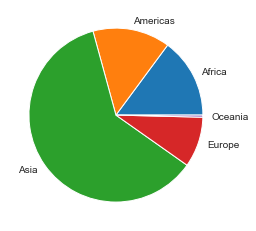

In [147]:
agg_df = (gapminder.loc[gapminder.year == 2007,:].groupby("continent", as_index = False).
agg(population = ("population", "sum")))

agg_df["population_mln"] = agg_df.population / 1000000

fig, ax = plt.subplots()

ax.pie(x = agg_df.population_mln, labels = agg_df.continent)

plt.show()

Ćwiczenie: Na podstawie zbioru danych sales oblicz całkowitą sprzedaż dla każdej grupy produktowej i zaprezentuj dane na wykresie kołowym. Na wykresie wyświetl dodatkowo procentowy udział każdej grupy produktowej w całkowitej liczbie sprzedawanych artykułów.

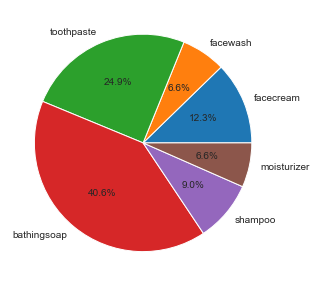

In [148]:
x = sales.loc[:,["facecream", "facewash", "toothpaste", "bathingsoap", "shampoo", "moisturizer"]].sum()

fig, ax = plt.subplots()

fig.set_size_inches([5, 5])

ax.pie(x = x.values, labels = x.index, autopct = '%1.1f%%')

plt.show()

Pytanie: Który wykres (słupkowy/kołowy) jest lepszy do wizualizacji danych i dlaczego ?

###### Histogramy

https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html#matplotlib.axes.Axes.hist

Ćwiczenie: Na podstawie zbioru danych flights przedstaw na histogramie rozkład zmiennej DepDelay (usuń wcześniej wartości odstające).

In [61]:
flights.head()

,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,DepDelay,ArrDelay
0,19,5,DL,11433,13303,-3,1
1,19,5,DL,14869,12478,0,-8
2,19,5,DL,14057,14869,-4,-15
3,19,5,DL,15016,11433,28,24
4,19,5,DL,11193,12892,-6,-11


In [121]:
q_5 = flights.DepDelay.quantile(0.05)
q_95 = flights.DepDelay.quantile(0.95)

norm_dep_delay = flights.DepDelay[ (flights.DepDelay > q_5) & (flights.DepDelay < q_95) ]

C:\Users\user\AppData\Local\Temp\ipykernel_1228\100707286.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


array([-3], dtype=int64)

C:\Users\user\AppData\Local\Temp\ipykernel_1228\3598259656.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


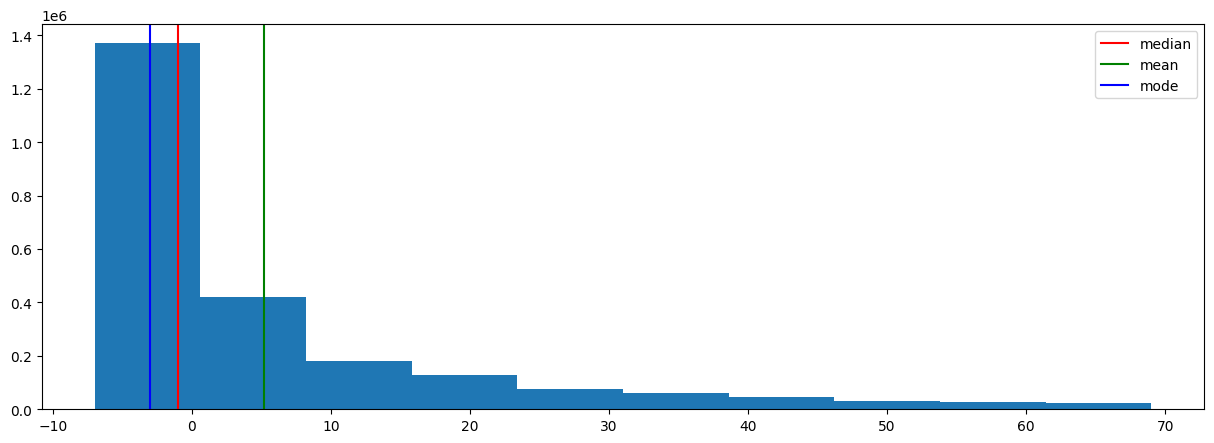

In [174]:
fig, ax = plt.subplots( figsize= (15,5))

ax.hist(norm_dep_delay)

ax.axvline(np.median(norm_dep_delay), c= "r", label= "median")
ax.axvline(np.mean(norm_dep_delay), c= "g", label= "mean")
ax.axvline(stats.mode(norm_dep_delay)[0], c= "b", label= "mode")


ax.legend()
plt.show();

Ćwiczenie: Przyjrzyj się liczbie karatów diamentów w zbiorze diamonds. Jaką ciekawą prawidłowość udało Ci się zaobserwować ?

In [161]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


C:\Users\user\AppData\Local\Temp\ipykernel_1228\2124635201.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


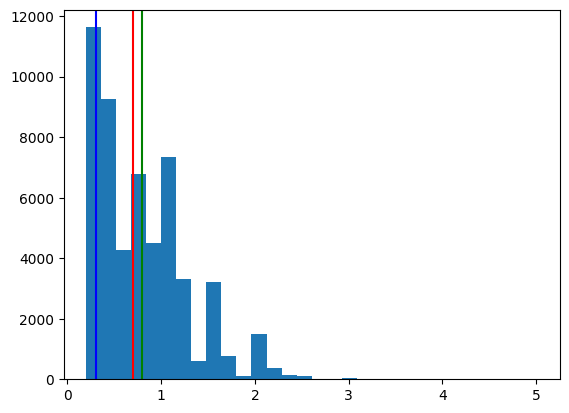

In [183]:
fig, ax = plt.subplots()

ax.hist(diamonds.carat, bins= 30)

ax.axvline(np.median(diamonds.carat), c= "r", label= "median")
ax.axvline(np.mean(diamonds.carat), c= "g", label= "mean")
ax.axvline(stats.mode(diamonds.carat)[0], c= "b", label= "mode")

plt.show();

Ćwiczenie: Na podstawie zbioru danych gapminder przedstaw rozkłady przeciętnej długości trwania życia na poszczególnych kontynentach w 2007 roku.

In [262]:
gapminder.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [5]:
gapminder_2007 = gapminder.loc[gapminder.year == 2007]

data_continent = pd.DataFrame(columns= pd.unique(gapminder.continent))
for i in data_continent.columns:
    data_continent[i] = gapminder_2007.loc[gapminder_2007.continent == i, "life_exp"].reset_index(drop= True)

In [270]:
data_continent.head()

,Asia,Europe,Africa,Americas,Oceania
0,43.828,76.423,72.301,75.320,81.235
1,75.635,79.829,42.731,65.554,80.204
2,64.062,79.441,56.728,72.390,NaN
3,59.723,74.852,50.728,80.653,NaN
4,72.961,73.005,52.295,78.553,NaN


C:\Users\user\AppData\Local\Temp\ipykernel_3604\3685977889.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


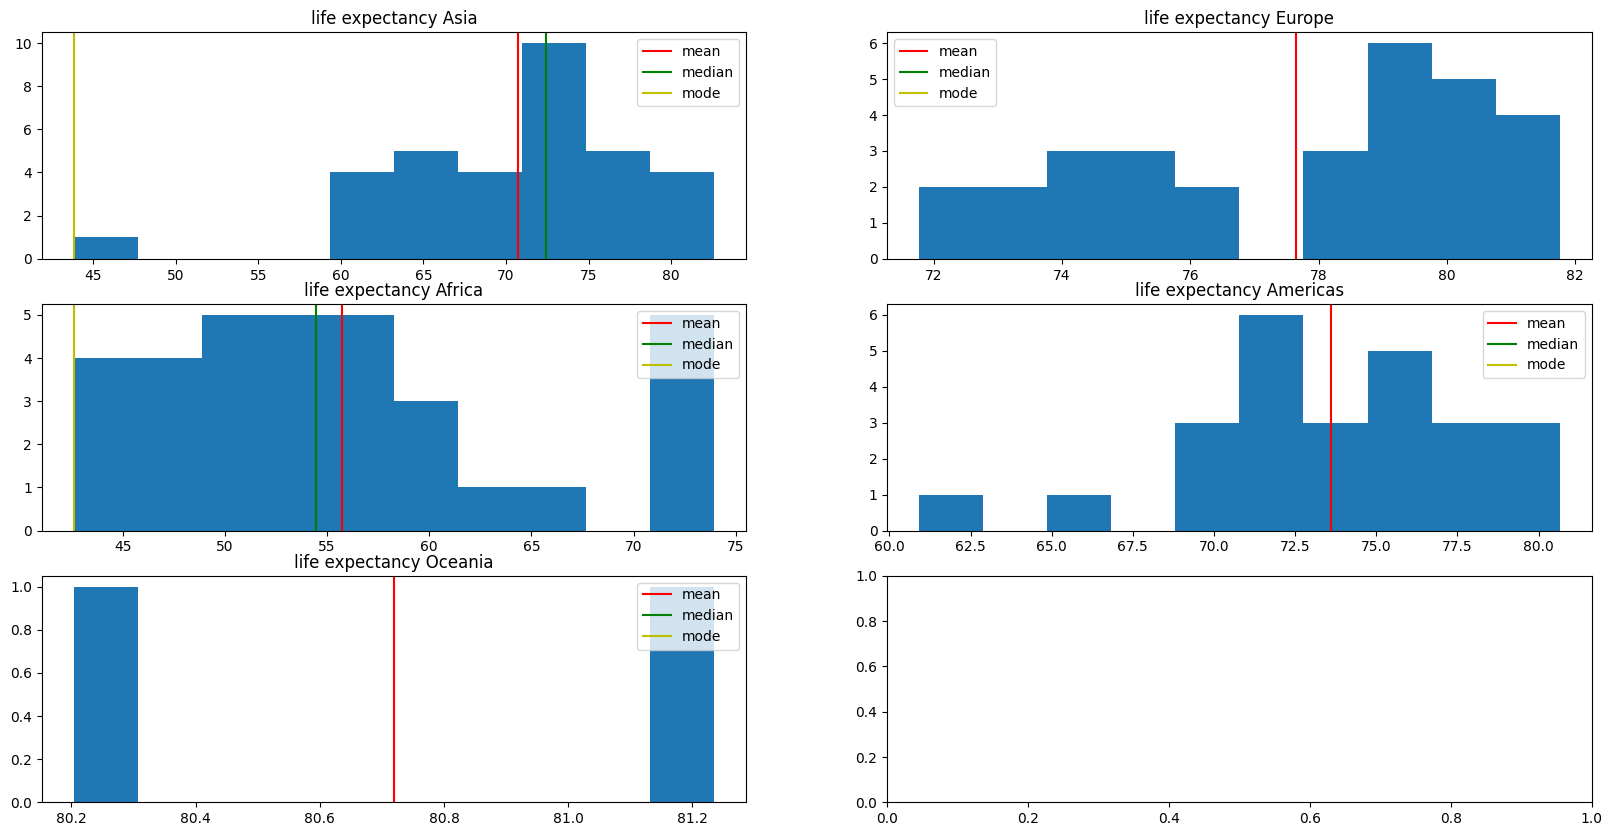

In [16]:
fig, ax = plt.subplots(3,2, figsize = (20,10))

for k, v in enumerate(pd.unique(gapminder.continent)):
#     print(k//2,k%2)
    ax[k//2, k%2].hist(data_continent[v])
    
    ax[k//2, k%2].axvline(np.mean(data_continent[v]), label= "mean", c= "r")
    ax[k//2, k%2].axvline(np.median(data_continent[v]), label= "median", c= "g")
    ax[k//2, k%2].axvline(stats.mode(data_continent[v])[0], label= "mode", c= "y")
    
    ax[k//2,k%2].set_title("life expectancy " + v)
#     ax[k//2,k%2].set_xlabel("Year")
    
    ax[k//2,k%2].legend()
    
    
plt.show()

###### Słupki błędu

Ćwiczenie: Przedstaw na jednym wykresie średnie ceny oraz odchylenia standardowe diamentów każdego koloru

In [43]:
diamonds.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


In [ ]:
# d_colors = diamonds.groupby("color", as_index = False).price.agg(("mean","std"))
# d_colors.head(1)

# fig, ax = plt.subplots(figsize= (8,5))

# ax.errorbar("mean","std", data= d_colors,
#             xerr = .9,  fmt = '.k', capsize=20)

# plt.show()

In [ ]:
# color = pd.DataFrame(columns=pd.unique(diamonds.color))

# for c in color.columns:
#     color[c] = diamonds.loc[diamonds.color == c, "price"].reset_index(drop = True)

    

# fig, ax = plt.subplots()

# ax.errorbar(x= diamonds.color, y= diamonds["price"], yerr = diamonds["price"].std(),
#               fmt = '.' )
# plt.show()

Ćwiczenie: Porównaj dynamikę zmian przeciętnej długości trwania życia w Europie i Azji. Zamieść na wykresie również informacje o zróżnicowaniu tej wielkości w obrębie kontynentu. 

In [17]:
#ToDo

###### Wykres pudełkowy (boxplot)

https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html#matplotlib.axes.Axes.boxplot

Ćwiczenie: Jakie rozkłady oczekiwanej długości życia mają kontynenty przedstawione na powyższym wykresie ?

Ćwiczenie: W oparciu o zbiór danych iris przedstaw na wykresach pudełkowych (jeden rysunek) rozkłady długości kielichów dla poszczególnych gatunków. Wykorzystaj do tego pętle for.

In [18]:
#ToDo

###### Wykres punktowy (scatterplot)

https://matplotlib.org/stable/plot_types/basic/scatter_plot.html#sphx-glr-plot-types-basic-scatter-plot-py

Ćwiczenie: Na podstawie zbioru danych sales przedstaw na wykresie punktowym korelacje między miesiącem w roku a sprzedażą pasty do zębów

In [19]:
#ToDo

###### Sposoby wyświetlania na wykresie punktowym dużej liczby danych

###### Zapisywanie wykresów

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html

Ćwiczenie: Na podstawie zbioru danych sales przedstaw na wykresie słupkowym sprzedaż mydła. Zapisz ten wykres na swoim komputerze.

In [20]:
#ToDo

# Seaborn

https://seaborn.pydata.org/

Styl i wielkość wykresu

Styl wykresu:
* sns.set_style("..."): https://seaborn.pydata.org/tutorial/aesthetics.html

Zmiana rozmiaru wykresu:
* plt.figure(figsize = (szerokość, wysokość))

###### Wykres punktowy

* https://seaborn.pydata.org/generated/seaborn.lmplot.html
* https://seaborn.pydata.org/generated/seaborn.regplot.html
* https://seaborn.pydata.org/generated/seaborn.scatterplot.html

###### lmplot

Ćwiczenie: Na podstawie zbioru danych tips przedstaw na odrębnych wykresach zależność (wraz z funkcją regresji) między wysokością rachunku i napiwku dla kobiet i mężczyzn. Linie przedstaw kolorem czerwonym bez przedziału ufności a punkty kolorem zielonym. 

In [21]:
#ToDo

###### regplot

regplot() i lmplot() są ze sobą powiązane. Pierwsza funkcja nie daje możliwości tworzenia siatki wykresów.

###### scatterplot

Ćwiczenie: Wykorzystując bibliotekę seaborn i zbiór danych mpg przedstaw na wykresie punktowym liczbę koni mechanicznych przypadającą na kg masy pojazdu oraz jego przyspieszenie. Wyodrębnij różnymi kolorami pojazdy o określonych liczbach cylindrów oraz uwzględnij wielkości punktów w zależności od ilości mil jakie mogą być przejechane na jednym galonie paliwa.

In [22]:
#ToDo

###### Wykres pudełkowy (boxplot)

https://seaborn.pydata.org/generated/seaborn.boxplot.html

###### Przykład analityczny

Przeanalizujmy ceny diamentów dla poszczególnych jakości cięcia.

Widać że diamenty o szlifie mniejszej jakości są droższe od diamentów z lepszym szlifem. Nie jest to logiczne i nie ma biznesowego uzasadnienia. Wiadomo że cenę diamentu poza jakością szlifu determinuje jego waga. Tak więc sprawdźmy rozkład masy diamentów dla poszczególnych jakości szlifów.

Jak widać diamenty o szlifie lepszej jakości mają niższą wagę. Usuńmy w takim razie wpływ wagi diamentu na jego cenę. Aby to zrobić należy wykorzystać do tego model zależności ceny diamentu od jego masy. Zwizualizujmy korelacje pomiędzy ceną a masą.

Zależność ma nieliniowy charakter. W tym przypadku można zastosować model liniowy lub zastosować transformację logarytmiczną. Wybierzmy ten drugi wariant.

Po przekształceniu zależność ma liniowy charakter i można do modelowania zastosować model liniowy. Wykorzystamy do tego model regresji liniowej.

Model odzwierciedla generalny wzorzec w danych (jest nieobciążony). Usuńmy więc wpływ masy diamentu na jego cenę i przedstawmy reszty na wykresie pudełkowym.

Aby wykres był czytelny usuńmy obserwacje odstające.

Jak widać w rzeczywistości diamenty o lepszej jakości szlifu ca bardziej wartościowe.

Ćwiczenie: Na podstawie zbioru danych tips za pomocą wykresów pudełkowych porównaj rozkłady wysokości napiwków w poszczególnych dniach.

In [23]:
#ToDo

###### Wykres skrzypcowy

https://seaborn.pydata.org/generated/seaborn.violinplot.html

###### Stripplot

https://seaborn.pydata.org/generated/seaborn.stripplot.html

###### Wykres rojowy

https://seaborn.pydata.org/generated/seaborn.swarmplot.html

###### Wykresy można nakładać na siebie

###### Catplot

https://seaborn.pydata.org/generated/seaborn.catplot.html

###### Mapa ciepła

https://seaborn.pydata.org/generated/seaborn.heatmap.html

Mapy kolorów: https://seaborn.pydata.org/tutorial/color_palettes.html
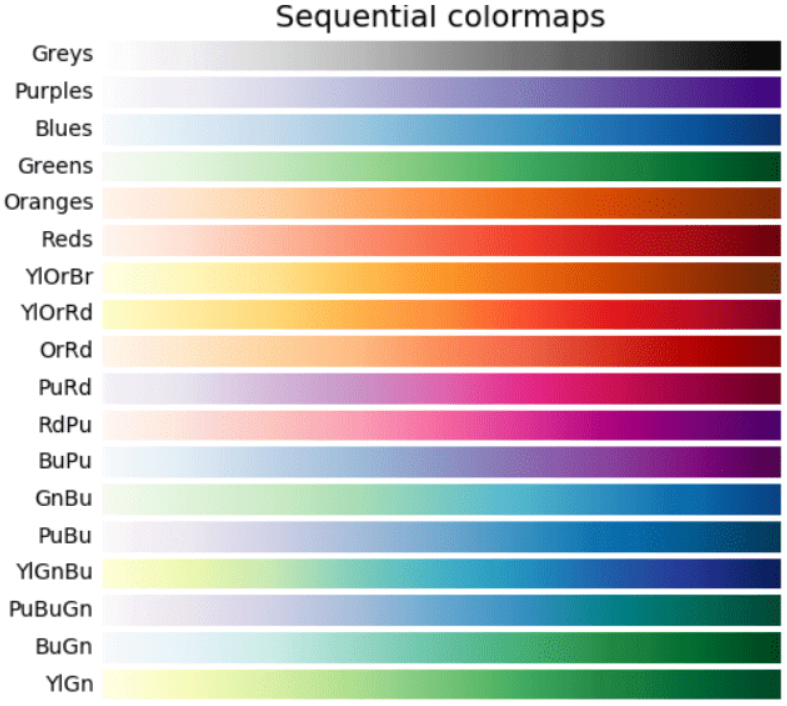

Ćwiczenie: Na podstawie zbioru danych flights_ts z wykorzystaniem mapy ciepła przedstaw liczbę pasażerów w poszczególnych latach i miesiącach. 

In [24]:
#ToDo

###### Mapa klastrów

https://seaborn.pydata.org/generated/seaborn.clustermap.html

Ćwiczenie: Przedstaw dane flights_ts na mapie klastrów. Na jakie główne okresy możemy podzielić dane ?

In [25]:
#ToDo

###### Histogram/wykres gęstości

* https://seaborn.pydata.org/generated/seaborn.histplot.html
* https://seaborn.pydata.org/generated/seaborn.kdeplot.html
* https://seaborn.pydata.org/generated/seaborn.distplot.html

###### Wykres słupkowy

* https://seaborn.pydata.org/generated/seaborn.countplot.html
* https://seaborn.pydata.org/generated/seaborn.barplot.html

###### Wykres rozrzutu z rozkładami

https://seaborn.pydata.org/generated/seaborn.jointplot.html

Ćwiczenie: Przedstaw na jednym wykresie zależność między masą i ceną diamentów wraz z ich rozkładami. Jak należy zaprezentować dane w tym przypadku ?

In [26]:
#ToDo

###### Wykres rozrzutu dla wielu zmiennych

https://www.python-graph-gallery.com/111-custom-correlogram/

###### Rugplot

https://seaborn.pydata.org/generated/seaborn.rugplot.html

###### PairGrid

https://seaborn.pydata.org/generated/seaborn.PairGrid.html

Ćwiczenie: Na podstawie zbioru danych wine stwórz jednowierszowego PairGrida ze zmiennymi Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity i Hue. Dla zmiennej Total phenols wyświetl histogram a dla pozostałych relacji dwuwymiarowy wykres gęstości. Rozbij dane na klasę wina. Wykorzystaj mapę kolorów "viridis".

In [27]:
#ToDo

###### FacetGrid

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

# GGplot

* https://plotnine.readthedocs.io/en/stable/index.html
* https://r-graph-gallery.com/ggplot2-package.html

###### Wykres słupkowy

###### Wykres rozrzutu

# Plotly 

https://plotly.com/python/